# Neural Networks

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [3]:
# Load dataset
trainSet = pd.read_csv('train.csv')
# Feature generation: training data
train = trainSet.drop(columns=['Name', 'Ticket', 'Cabin'])
train = train.dropna(axis=0)
train = pd.get_dummies(train)
# train validation split
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['PassengerId','Survived'], axis=0),
                                                  train['Survived'],
                                                  test_size=0.2, random_state=150,
                                                  stratify=train['Survived'])

In [4]:
# Create function
def hyperpara_func(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_func():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    Early_stopping = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_func, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=150)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[Early_stopping]}).mean()
    return score

In [5]:
# Set paramaters
neuralnetworks_parameters ={
    'neurons': (5, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(10, 1000),
    'epochs':(10, 100)
}
# Run Bayesian Optimization
try:
    nn_bo = BayesianOptimization(hyperpara_func, neuralnetworks_parameters, random_state=150)
    nn_bo.maximize(init_points=25, n_iter=4)
except TypeError:
    pass

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
|  1        |  0.7626   |  8.177    |  265.4    |  88.99    |  0.7416   |  71.32    |  3.62     |
|  2        |  0.5186   |  8.569    |  914.5    |  17.04    |  0.7845   |  15.8     |  4.486    |
|  3        |  0.5958   |  0.7179   |  239.6    |  44.74    |  0.2444   |  99.85    |  2.725    |
|  4        |  0.5958   |  6.515    |  457.2    |  52.92    |  0.5498   |  46.12    |  4.128    |
|  5        |  0.5586   |  0.9447   |  862.5    |  37.72    |  0.4918   |  24.96    |  4.341    |
|  6        |  0.5327   |  3.072    |  499.6    |  37.66    |  0.4234   |  77.22    |  0.2866   |
|  7        |  0.5572   |  4.499    |  814.6    |  56.83    |  0.4372   |  75.18    |  5.2      |
|  8        |  0.7101   |  7.928    |  982.7    |  29.79    |  0.1024   |  18.84    |  2.876    |
|  9        |  0.52 

In [6]:
neuralnetworks_parameters_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
neuralnetworks_parameters_['activation'] = activationL[round(neuralnetworks_parameters_['activation'])]
neuralnetworks_parameters_

{'activation': 'softsign',
 'batch_size': 489.3595378673304,
 'epochs': 90.66800526898291,
 'learning_rate': 0.19717187151649088,
 'neurons': 16.021963199249825,
 'optimizer': 1.898975085713869}

In [7]:
# Create function
def layer_func(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_func():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    Early_stopping = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_func, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=150)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[Early_stopping]}).mean()
    return score

In [8]:
neuralnetworks_parameters2 ={
    'neurons': (5, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(10, 1000),
    'epochs':(10, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
try:
    nn_bo = BayesianOptimization(layer_func, neuralnetworks_parameters2, random_state=150)
    nn_bo.maximize(init_points=25, n_iter=4)
except TypeError:
    pass

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.5905   |  8.177    |  265.4    |  0.8777   |  0.2217   |  72.83    |  2.034    |  2.904    |  0.9145   |  12.43    |  0.7823   |  0.7957   |
|  2        |  0.5151   |  5.768    |  88.97    |  0.232    |  0.1158   |  31.31    |  2.997    |  1.779    |  0.7266   |  47.92    |  0.4769   |  3.817    |
|  3        |  0.5572   |  3.895    |  593.8    |  0.105    |  0.2583   |  37.72    |  1.973    |  1.42     |  0.6239   |  37.43    |  0.4946   |  2.151    |
|  4        |  0.5958   |  3.758    |  762.6    |  0.04094  |  0.15     |  83.14    |  2.041    |  1.863    |  0.7413   |  75.57    |  0.8808   |  6.878    |
|  5        |  0.5975   |  1.979    |  102.4    |  0

In [9]:
neuralnetworks_parameters_ = nn_bo.max['params']
learning_rate = neuralnetworks_parameters_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
neuralnetworks_parameters_['activation'] = activationL[round(neuralnetworks_parameters_['activation'])]
neuralnetworks_parameters_['batch_size'] = round(neuralnetworks_parameters_['batch_size'])
neuralnetworks_parameters_['epochs'] = round(neuralnetworks_parameters_['epochs'])
neuralnetworks_parameters_['layers1'] = round(neuralnetworks_parameters_['layers1'])
neuralnetworks_parameters_['layers2'] = round(neuralnetworks_parameters_['layers2'])
neuralnetworks_parameters_['neurons'] = round(neuralnetworks_parameters_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
neuralnetworks_parameters_['optimizer'] = optimizerD[optimizerL[round(neuralnetworks_parameters_['optimizer'])]]
neuralnetworks_parameters_

{'activation': 'selu',
 'batch_size': 83,
 'dropout': 0.6929563333529957,
 'dropout_rate': 0.007370607090950998,
 'epochs': 74,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.5957953766857114,
 'neurons': 41,
 'normalization': 0.5381201763172544,
 'optimizer': <keras.optimizer_v2.adadelta.Adadelta at 0x26ebc2f24f0>}

In [10]:
# Fitting Neural Network
def nn_func():
    nn = Sequential()
    nn.add(Dense(neuralnetworks_parameters_['neurons'], input_dim=10, activation=neuralnetworks_parameters_['activation']))
    if neuralnetworks_parameters_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(neuralnetworks_parameters_['layers1']):
        nn.add(Dense(neuralnetworks_parameters_['neurons'], activation=neuralnetworks_parameters_['activation']))
    if neuralnetworks_parameters_['dropout'] > 0.5:
        nn.add(Dropout(neuralnetworks_parameters_['dropout_rate'], seed=123))
    for i in range(neuralnetworks_parameters_['layers2']):
        nn.add(Dense(neuralnetworks_parameters_['neurons'], activation=neuralnetworks_parameters_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=neuralnetworks_parameters_['optimizer'], metrics=['accuracy'])
    return nn
        
Early_stopping = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_func, epochs=neuralnetworks_parameters_['epochs'], batch_size=neuralnetworks_parameters_['batch_size'],
                         verbose=0)
 
history=nn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=neuralnetworks_parameters_['epochs']
epochs_range = range(epochs)

Epoch 1/74
7/7 [==============================] - 2s 67ms/step - loss: 0.7571 - accuracy: 0.4780 - val_loss: 0.7539 - val_accuracy: 0.4476
Epoch 2/74
7/7 [==============================] - 0s 11ms/step - loss: 0.6269 - accuracy: 0.6784 - val_loss: 0.6288 - val_accuracy: 0.6294
Epoch 3/74
7/7 [==============================] - 0s 11ms/step - loss: 0.6066 - accuracy: 0.6731 - val_loss: 0.6263 - val_accuracy: 0.6713
Epoch 4/74
7/7 [==============================] - 0s 11ms/step - loss: 0.5984 - accuracy: 0.6977 - val_loss: 0.6303 - val_accuracy: 0.6503
Epoch 5/74
7/7 [==============================] - 0s 11ms/step - loss: 0.5835 - accuracy: 0.7170 - val_loss: 0.6333 - val_accuracy: 0.6503
Epoch 6/74
7/7 [==============================] - 0s 14ms/step - loss: 0.5654 - accuracy: 0.7206 - val_loss: 0.6503 - val_accuracy: 0.6434
Epoch 7/74
7/7 [==============================] - 0s 11ms/step - loss: 0.5534 - accuracy: 0.7276 - val_loss: 0.7250 - val_accuracy: 0.6014
Epoch 8/74
7/7 [===========

7/7 [==============================] - 0s 12ms/step - loss: 0.4014 - accuracy: 0.8102 - val_loss: 0.4769 - val_accuracy: 0.7902
Epoch 60/74
7/7 [==============================] - 0s 12ms/step - loss: 0.3942 - accuracy: 0.8260 - val_loss: 0.5026 - val_accuracy: 0.7622
Epoch 61/74
7/7 [==============================] - 0s 15ms/step - loss: 0.3967 - accuracy: 0.8172 - val_loss: 0.4894 - val_accuracy: 0.7902
Epoch 62/74
7/7 [==============================] - 0s 15ms/step - loss: 0.4026 - accuracy: 0.8120 - val_loss: 0.4704 - val_accuracy: 0.7622
Epoch 63/74
7/7 [==============================] - 0s 12ms/step - loss: 0.4071 - accuracy: 0.8190 - val_loss: 0.5028 - val_accuracy: 0.7832
Epoch 64/74
7/7 [==============================] - 0s 12ms/step - loss: 0.4024 - accuracy: 0.8207 - val_loss: 0.4601 - val_accuracy: 0.7902
Epoch 65/74
7/7 [==============================] - 0s 12ms/step - loss: 0.3975 - accuracy: 0.8383 - val_loss: 0.4609 - val_accuracy: 0.7902
Epoch 66/74
7/7 [===============

Training Accuracy : 0.831283 
Validation Accuracy : 0.811189 


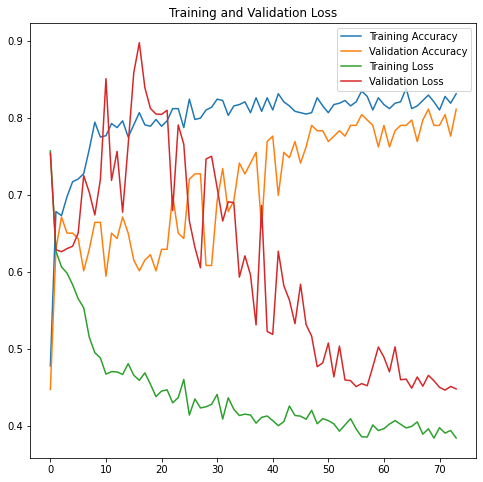

In [11]:
print("Training Accuracy : %f "% acc[-1])
print("Validation Accuracy : %f "% val_acc[-1])
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Manually Tuned Neural Network

In [12]:
model = Sequential()
model.add(Dense(units=12, activation='relu', input_shape=(10,)))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])
history = model.fit(X_train, y_train,
 batch_size=20,
 epochs=20,
 verbose=1,
 validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
acc1 = history.history['accuracy']
val_acc1 = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=20
epochs_range = range(epochs)

Model: "sequential_251"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1114 (Dense)          (None, 12)                132       
                                                                 
 dropout_56 (Dropout)        (None, 12)                0         
                                                                 
 dense_1115 (Dense)          (None, 5)                 65        
                                                                 
 dropout_57 (Dropout)        (None, 5)                 0         
                                                                 
 dense_1116 (Dense)          (None, 1)                 6         
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
29/29 [==============================] - 1s

Test loss: 0.6407181620597839
Test accuracy: 0.6223776340484619


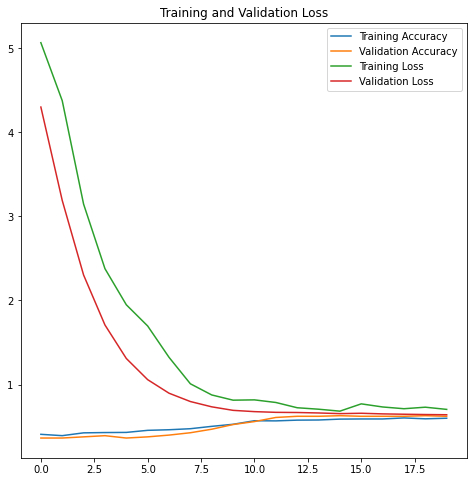

In [13]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Decision Tree Classifier

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score
#https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [15]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_val,y_val)

In [16]:
stored_Tvalues1=clf1.predict(X_train)
accuracy_score(y_train,stored_Tvalues1) # here stored_Tvalues is y_predict

0.6924428822495606

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [18]:
stored_Tvalues=clf.predict(X_val)
accuracy_score(y_val,stored_Tvalues) # here stored_Tvalues is y_predict

0.7762237762237763

In [19]:
print("Train Accuracy:",accuracy_score(y_train,stored_Tvalues1))
print("Validation Accuracy:",accuracy_score(y_val,stored_Tvalues))

Train Accuracy: 0.6924428822495606
Validation Accuracy: 0.7762237762237763


# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
gnb = GaussianNB()
y_pred1 = gnb.fit(X_val, y_val).predict(X_train)

In [22]:
y_pred1

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [23]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_val)

In [24]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [25]:
print("Train Accuracy:",accuracy_score(y_train, y_pred1))
print("Validation Accuracy:",accuracy_score(y_val, y_pred))

Train Accuracy: 0.7662565905096661
Validation Accuracy: 0.7902097902097902


# Accuracy Table

In [26]:
Type_list=["Bayesian Neural Networks Optimizer","Manually Tuned Neural Network","Decision Tree Classifier","Naive Bayes"]
Train_acc=[acc[-1],score[1],accuracy_score(y_train,stored_Tvalues1),accuracy_score(y_train, y_pred1)]
Test_acc=[val_acc[-1],score[0],accuracy_score(y_val,stored_Tvalues),accuracy_score(y_val, y_pred)]

In [27]:
Train_acc

[0.8312829732894897,
 0.6223776340484619,
 0.6924428822495606,
 0.7662565905096661]

In [28]:
Test_acc

[0.811188817024231, 0.6407181620597839, 0.7762237762237763, 0.7902097902097902]

In [29]:
data={"Method":Type_list,"Accuracy (train)":Train_acc,"Accuracy (validation)":Test_acc}

In [30]:
Accuracydf=pd.DataFrame(data)

In [31]:
Accuracydf 

,Method,Accuracy (train),Accuracy (validation)
0,Bayesian Neural Networks Optimizer,0.831283,0.811189
1,Manually Tuned Neural Network,0.622378,0.640718
2,Decision Tree Classifier,0.692443,0.776224
3,Naive Bayes,0.766257,0.790210
